In this section we will see the basics of supervised machine learning with a logistic regression classifier. We will see a simple example and see how to evaluate the performance of a binary classifier and avoid over-fitting.
# Supervised machine learning

This section is partially inspired by the following Reference: http://cs229.stanford.edu/notes/cs229-notes1.pdf

Supervised learning consists of inferring a function from a labeled training set. On the other hand, unsupervised learning is a machine learning technique used when the input data is not labeled. Clustering is a example of unsupervised learning. 

For supervised learning, we define:

- The **features** (input variables) $x^{(i)}\in \mathbb{X}$ 
- The **target** (output we are trying to predict) $y^{(i)} \in \mathbb{Y}$

A pair $(x^{(i)},y^{(i)})$ is a **training example**.

The set $\{(x^{(i)},y^{(i)}); i = 1,...,m\}$ is the **training set**:

The goal of supervised learning is to learn a function $h: \mathbb{X}\mapsto\mathbb{Y}$, called the hypothesis, so that $h(x)$ is a good 
predictor of the corresponding $y$.

- **Regression** correspond to the case where $y$ is a continuous variable
- **Classification** correspond to the case where $y$ can only take a small number of discrete values

Examples: 
- Univariate Linear Regression: $h_w(x) = w_0+w_1x$,  with $\mathbb{X} = \mathbb{Y} = \mathbb{R}$
- Multivariate Linear Regression: $$h_w(x) = w_0+w_1x_1 + ... + w_nx_n = \sum_{i=0}^{n}w_ix_i = w^Tx,$$
with $\mathbb{Y} = \mathbb{R}$ and $\mathbb{X} = \mathbb{R^n}$.
Here $w_0$ is the intercept with the convention that $x_0=1$ to simplify notation.



## Binary Classification with Logistic Regression

- $y$ can take only two values, 0 or 1. For example, if $y$ is the sentiment associated with the tweet,
$y=1$ if the tweet is "positive" and $y=0$ is the tweet is "negative".

- $x^{(i)}$ represents the features of a tweet. For example the presence or absence of certain words.

- $y^{(i)}$ is the **label** of the training example represented by $x^{(i)}$.


Since $y\in\{0,1\}$ we want to limit $h_w(x)$ between $[0,1]$.

The **Logistic regression** consists of choosing $h_w(x)$ as

$$
h_w(x) = \frac{1}{1+e^{-w^Tx}}
$$

where $w^Tx = \sum_{i=0}^{n}w_ix_i$ and $h_w(x) = g(w^Tx)$ with

$$
g(x)=\frac{1}{1+e^{-w^Tx}}.
$$

$g(x)$ is the **logistic function** or **sigmoid function**


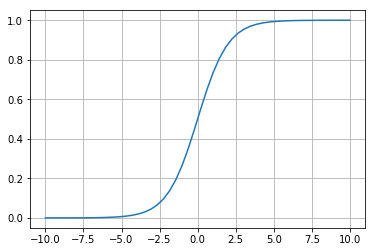

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-10,10)
y = 1/(1+np.exp(-x))

p = plt.plot(x,y)
plt.grid(True)

- $g(x)\rightarrow 1$ for $x\rightarrow\infty$
- $g(x)\rightarrow 0$ for $x\rightarrow -\infty$
- $g(0) = 1/2$

Finally, to go from the regression to the classification, we can simply apply the following condition:

$$
y=\left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if}\ h_w(x)>=1/2 \\
    0, & \text{otherwise}
  \end{array}\right.
$$

Let's clarify the notation. We have **$m$ training samples** and **$n$ features**, our training examples can be represented by a **$m$-by-$n$ matrix** $\underline{\underline{X}}=(x_{ij})$ ($m$-by-$n+1$, if we include the intercept term) that contains the training examples, $x^{(i)}$, in its rows.

The target values of the training set can be represented as a $m$-dimensional vector $\underline{y}$ and the parameters 
of our model as
a $n$-dimensional vector $\underline{w}$ ($n+1$ if we take into account the intercept).

Now, for a given training example $x^{(i)}$, the function that we want to learn (or fit) can be written:

$$
h_\underline{w}(x^{(i)}) = \frac{1}{1+e^{-\sum_{j=0}^n w_j x_{ij}}}
$$


(20,)
(20,)


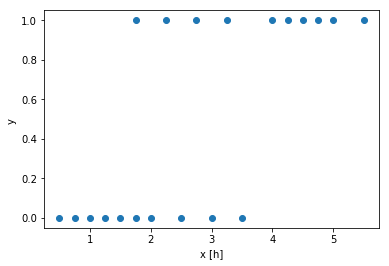

In [12]:
# Simple example:
# we have 20 students that took an exam and we want to know if we can use 
# the number of hours they studied to predict if they pass or fail the
# exam

# m = 20 training samples 
# n = 1 feature (number of hours)

X = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
# 1 = pass, 0 = fail
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

print(X.shape)

print(y.shape)

p = plt.plot(X,y,'o')
tx = plt.xlabel('x [h]')
ty = plt.ylabel('y ')



### Likelihood of the model

How to find the parameters, also called *weights*, $\underline{w}$ that best fit our training data?
We want to find the weights $\underline{w}$ that maximize the likelihood of observing the target $\underline{y}$ given the observed features $\underline{\underline{X}}$.
We need a probabilistic model that gives us the probability of observing the value $y^{(i)}$ given the features $x^{(i)}$.

The function $h_\underline{w}(x^{(i)})$ can be used precisely for that:

$$
P(y^{(i)}=1|x^{(i)};\underline{w}) = h_\underline{w}(x^{(i)})
$$

$$
P(y^{(i)}=0|x^{(i)};\underline{w}) = 1 - h_\underline{w}(x^{(i)})
$$


we can write it more compactly as:

$$
P(y^{(i)}|x^{(i)};\underline{w}) = (h_\underline{w}(x^{(i)}))^{y^{(i)}} ( 1 - h_\underline{w}(x^{(i)}))^{1-y^{(i)}}
$$
where $y^{(i)}\in\{0,1\}$


We see that $y^{(i)}$ is a random variable following a Bernouilli distribution with expectation $h_\underline{w}(x^{(i)})$.



The **Likelihood function** of a statistical model is defined as:
$$
\mathcal{L}(\underline{w}) = \mathcal{L}(\underline{w};\underline{\underline{X}},\underline{y}) = P(\underline{y}|\underline{\underline{X}};\underline{w}).
$$

The likelihood takes into account all the $m$ training samples of our training dataset and estimates the likelihood 
of observing $\underline{y}$ given $\underline{\underline{X}}$ and $\underline{w}$. Assuming that the $m$ training examples were generated independently, we can write:

$$
\mathcal{L}(\underline{w}) = P(\underline{y}|\underline{\underline{X}};\underline{w}) = \prod_{i=1}^m P(y^{(i)}|x^{(i)};\underline{w}) = \prod_{i=1}^m (h_\underline{w}(x^{(i)}))^{y^{(i)}} ( 1 - h_\underline{w}(x^{(i)}))^{1-y^{(i)}}.
$$

This is the function that we want to maximize. It is usually much simpler to maximize the logarithm of this function, which is equivalent.

$$
l(\underline{w}) = \log\mathcal{L}(\underline{w}) = \sum_{i=1}^{m} \left(y^{(i)} \log h_\underline{w}(x^{(i)}) + (1- y^{(i)})\log\left(1- h_\underline{w}(x^{(i)})\right) \right)
$$

### Loss function and linear models

An other way of formulating this problem is by defining a Loss function $L\left(y^{(i)}, f(x^{(i)})\right)$ such that:

$$
\sum_{i=1}^{m} L\left(y^{(i)}, f(x^{(i)})\right) = - l(\underline{w}).
$$

And now the problem consists of minimizing $\sum_{i=1}^{m} L\left(y^{(i)}, f(x^{(i)})\right)$ over all the possible values of $\underline{w}$.

Using the definition of $h_\underline{w}(x^{(i)})$ you can show that $L$ can be written as:
$$
L\left(y^{(i)}=1, f(x^{(i)})\right) = \log_2\left(1+e^{-f(x^{(i)})}\right)
$$
and
$$
L\left(y^{(i)}=0, f(x^{(i)})\right) = \log_2\left(1+e^{-f(x^{(i)})}\right) - \log_2\left(e^{-f(x^{(i)})}\right)
$$

where $f(x^{(i)}) = \sum_{j=0}^n w_j x_{ij}$ is called the **decision function**.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fx = np.linspace(-5,5)
Ly1 = np.log2(1+np.exp(-fx))
Ly0 = np.log2(1+np.exp(-fx)) - np.log2(np.exp(-fx))

p = plt.plot(fx,Ly1,label='L(1,f(x))')
p = plt.plot(fx,Ly0,label='L(0,f(x))')
plt.xlabel('f(x)')
plt.ylabel('L')
plt.legend()

In [ ]:
# coming back to our simple example

def Loss(x_i,y_i, w0, w1):
    fx = w0 + x_i*w1
    
    if y_i == 1:
        return np.log2(1+np.exp(-fx))
    if y_i == 0:
        return np.log2(1+np.exp(-fx)) - np.log2(np.exp(-fx))
    else:
        raise Exception('y_i must be 0 or 1')
        
def sumLoss(x,y, w0, w1):
    sumloss = 0
    for x_i, y_i in zip(x,y):
        sumloss += Loss(x_i,y_i, w0, w1)
    return sumloss
        

# lets compute the loss function for several values
w0s = np.linspace(-10,20,100)
w1s = np.linspace(-10,20,100)

sumLoss_vals = np.zeros((w0s.size, w1s.size))
for k, w0 in enumerate(w0s):
    for l, w1 in enumerate(w1s):
        sumLoss_vals[k,l] = sumLoss(X,y,w0,w1)
        


(array([19]), array([38]))
(array([-4.24242424]), array([ 1.51515152]))


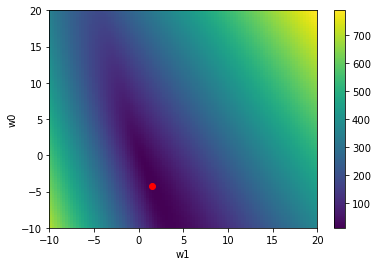

In [13]:
# let's find the values of w0 and w1 that minimize the loss
ind0, ind1 = np.where(sumLoss_vals == sumLoss_vals.min())

print((ind0,ind1))
print((w0s[ind0], w1s[ind1]))

# plot the loss function
p = plt.pcolor(w0s, w1s, sumLoss_vals)
c = plt.colorbar()

p2 = plt.plot(w1s[ind1], w0s[ind0], 'ro')

tx = plt.xlabel('w1')
ty = plt.ylabel('w0')




Here we found the minimum of the loss function simply by computing it over a large range of values. In practice, this approach is not possible when the dimensionality of the loss function (number of weights) is very large. To find the minimum of the loss function, the gradient descent algorithm (or [stochastic gradient descent](http://scikit-learn.org/stable/modules/sgd.html)) is often used.

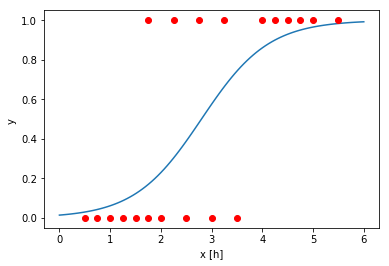

In [14]:
# plot the solution

x = np.linspace(0,6,100)

def h_w(x, w0=w0s[ind0], w1=w1s[ind1]):
    return 1/(1+np.exp(-(w0+x*w1)))

p1 = plt.plot(x, h_w(x))
p2 = plt.plot(X,y,'ro')
tx = plt.xlabel('x [h]')
ty = plt.ylabel('y ')


In [ ]:
# probability of passing the exam if you worked 5 hours:
print(h_w(5))

We will use the package sci-kit learn (http://scikit-learn.org/) that provide access to many tools for machine learning, data mining and data analysis.

In [ ]:
# The same thing using the sklearn module
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e10)

# to train our model we use the "fit" method
# we have to reshape X because we have only one feature here
model.fit(X.reshape(-1,1),y)

# to see the weights
print(model.coef_)
print(model.intercept_)

# use the trained model to predict new values
print(model.predict_proba(5))
print(model.predict(5))

Note that although the loss function is not linear, the decision function is a **linear function of the weights and features**. This is why the Logistic regression is called a **linear model**.

Other linear models are defined by different loss functions. For example:
- Perceptron: $L \left(y^{(i)}, f(x^{(i)})\right) = \max(0, -y^{(i)}\cdot f(x^{(i)}))$
- Hinge-loss (soft-margin Support vector machine (SVM) classification): $L \left(y^{(i)}, f(x^{(i)})\right) = \max(0, 1-y^{(i)}\cdot f(x^{(i)}))$

See http://scikit-learn.org/stable/modules/sgd.html for more examples.


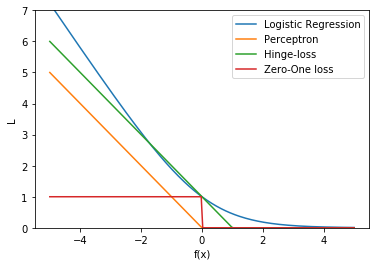

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fx = np.linspace(-5,5, 200)
Logit = np.log2(1+np.exp(-fx))
Percep = np.maximum(0,- fx) 
Hinge = np.maximum(0, 1- fx)
ZeroOne = np.ones(fx.size)
ZeroOne[fx>=0] = 0

p = plt.plot(fx,Logit,label='Logistic Regression')
p = plt.plot(fx,Percep,label='Perceptron')
p = plt.plot(fx,Hinge,label='Hinge-loss')
p = plt.plot(fx,ZeroOne,label='Zero-One loss')
plt.xlabel('f(x)')
plt.ylabel('L')
plt.legend()
ylims = plt.ylim((0,7))

### Evaluating the performance of a binary classifier

The confusion matrix allows to visualize the performance of a classifier:

|          |  predicted positive  |  predicted negative |
| ---    |:---:|:---:|
| real positive | TP |  FN        |
| real negative | FP | TN |        

For each prediction $y_p$, we put it in one of the four categories based on the true value of $y$:
- TP = True Positive
- FP = False Positive
- TN = True Negative
- FN = False Negative

We can then evalute several measures, for example:

#### Accuracy:

$\text{Accuracy}=\frac{TP+TN}{TP+TN+FP+FN}$

Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined. However, accuracy is not necessarily a good measure of the predictive power of a model. See the example below:

#### Accuracy paradox:
A classifier with these results:

| 	|Predicted Negative | 	Predicted Positive|
|     --- |---|---|
|Negative Cases 	|9,700 |	150|
|Positive Cases 	|50 	|100|

has an accuracy = 98%.

Now consider the results of a classifier that systematically predict a negative result independently of the input:

| |Predicted Negative| 	Predicted Positive|
|---|---|---|
|Negative Cases| 	9,850 | 	0|
|Positive Cases| 	150  |0 |

The accuracy of this classifier is 98.5% while it is clearly useless. Here the less accurate model is more useful than the more accurate one. This is why accuracy should not be used (alone) to evaluate the performance of a classifier. 
Precision and Recall are usually prefered:

#### Precision:

$\text{Precision}=\frac{TP}{TP+FP}$

Precision measures the fraction of correct positive or the lack of false positive.
It answers the question: "Given a positive prediction from the classifier, how likely is it to be correct ?"

#### Recall:

$\text{Recall}=\frac{TP}{TP+FN}$

Recall measures the proportion of positives that are correctly identified as such or the lack of false negative.
It answers the question: "Given a positive example, will the classifier detect it ?"

#### $F_1$ score:

In order to account for the precision and recall of a classifier, $F_1$ score takes the harmonic mean of both measures:

$F_1 = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{ \mathrm{precision} + \mathrm{recall}} = 2 \frac{TP}{2TP +FP+FN}$

When evaluating the performance of a classifier it is important to test is on a different set of values than then set we used to train it. Indeed, we want to know how the classifier performs on new data not on the training data. For this purpose we separate the training set in two: a part that we use to train the model and a part that we use to test it. This method is called **cross-validation**. Usually, we split the training set in N parts (typically 3 or 10), train the model on N-1 parts and test it on the remaining part. We then repeat this procedure with all the combination of training and testing parts and average the performance metrics from each tests. Sci-kit learn allows to easily perform cross-validation: http://scikit-learn.org/stable/modules/cross_validation.html

### Regularization and over-fitting
Overfitting happens when your model is too complicated to generalise for new data. When your model fits your data perfectly, it is unlikely to fit new data well.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/19/Overfitting.svg" style="width: 250px;"/>

The model in green is over-fitted. It performs very well on the training set, but it does not generalize well to new data compared to the model in black.

To avoid over-fitting, it is important to have a large training set and to use cross-validation to evaluate the performance of a model. Additionally, **regularization** is used to make the model less "complex" and more general.

Regularization consists in adding a term $R(\underline{w})$, that penalizes too "complex" models, to the loss function, so that the training error that we want to minimize is:

$E(\underline{w}) = \sum_{i=1}^{m} L\left(y^{(i)}, f(x^{(i)})\right) + \lambda R(\underline{w})$,

where $\lambda$ is a parameter that controls the strength of the regularization.

Usual choices for $R(\underline{w})$ are:
- L2 norm of the weights: $R(\underline{w}) := \frac{1}{2} \sum_{i=1}^{n} w_j^2$, which forces small weights in the solution,
- L1 norm of the weights: $R(\underline{w}) := \sum_{i=1}^{n} |w_j|$, (also refered as Lasso) which leads to sparse solutions (with several zero weights).

The choice of the regularization and of the its strength are usually done by selecting the best choice during the cross-validation.

In [16]:
# for example
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# logistic regression with L2 regularization, C controls the strength of the regularization
# C = 1/lambda
model = LogisticRegression(C=1, penalty='l2')

# cross validation using 10 folds
y_pred = cross_val_predict(model, X.reshape(-1,1), y=y, cv=10)

print(confusion_matrix(y,y_pred))


print('Accuracy = ' + str(accuracy_score(y, y_pred)))
print('Precision = ' + str(precision_score(y, y_pred)))
print('Recall = ' + str(precision_score(y, y_pred)))
print('F_1 = ' + str(f1_score(y, y_pred)))

# try to run it with different number of folds for the cross-validation 
# and different values of the regularization strength



[[7 3]
 [2 8]]
Accuracy = 0.75
Precision = 0.727272727273
Recall = 0.727272727273
F_1 = 0.761904761905
